<a href="https://colab.research.google.com/github/Zac-Sells/MLA_ZTS/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 5  
**Zac Sells**  

## Standard Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


## Imports for Splitting Data and Building Pipeline


In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [9]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Statistical and Visual Exploration

In [10]:
landsat_train.head()



,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [11]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


In [12]:
landtypes1 = landsat_train['land_type'].groupby(landsat_train['land_type']).count()
landtypes1

land_type
1    1072
2     479
3     961
4     415
5     470
7    1038
Name: land_type, dtype: int64

<Axes: xlabel='land_type'>

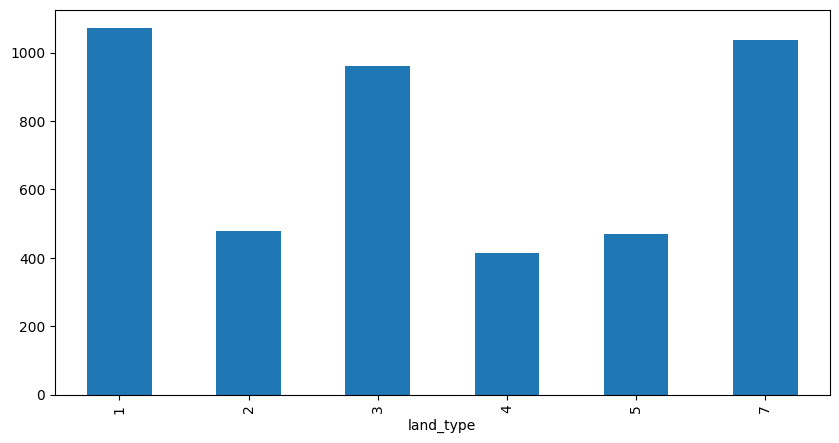

In [13]:
landtypes1.plot(kind='bar',figsize=(10,5))

In [14]:
landtypes2 = landsat_test['land_type'].groupby(landsat_test['land_type']).count()
landtypes2

land_type
1    461
2    224
3    397
4    211
5    237
7    470
Name: land_type, dtype: int64

<Axes: xlabel='land_type'>

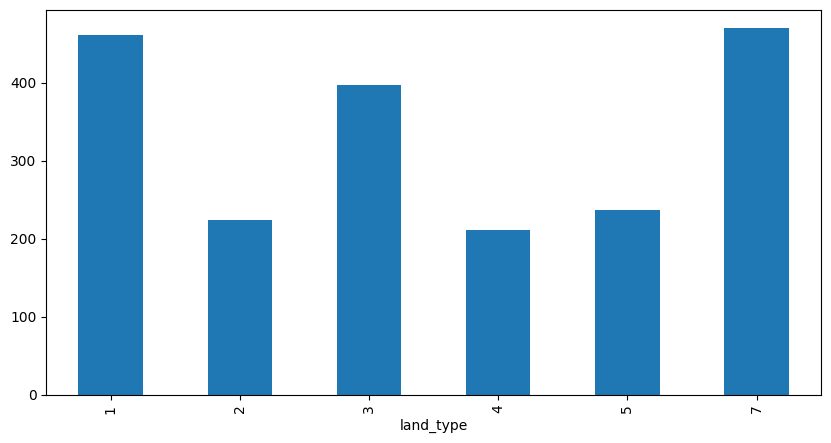

In [15]:
landtypes2.plot(kind='bar', figsize=(10,5))

### Splitting Data into Train/Test

In [16]:
landsat_test.columns

Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2', 'land_type'],
      dtype='object')

In [17]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1] 
y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

In [18]:
num_attribs = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2']

### Building the Pipeline

In [19]:
col_transform= ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(),num_attribs)],
                                  remainder='passthrough')

In [20]:
random_forest= Pipeline([('transform', col_transform),('rf',RandomForestClassifier(n_estimators=1000,max_samples=4435,bootstrap=True,oob_score=True, n_jobs=-1))])

### Executing the Model

In [21]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=4435, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

### Evaluating Model

In [22]:
random_forest.named_steps.rf.oob_score_

0.9183765501691094

In [23]:
y_pred = random_forest.predict(X_test)


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.97      0.98      0.98       224
           3       0.89      0.95      0.92       397
           4       0.79      0.63      0.70       211
           5       0.92      0.90      0.91       237
           7       0.87      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



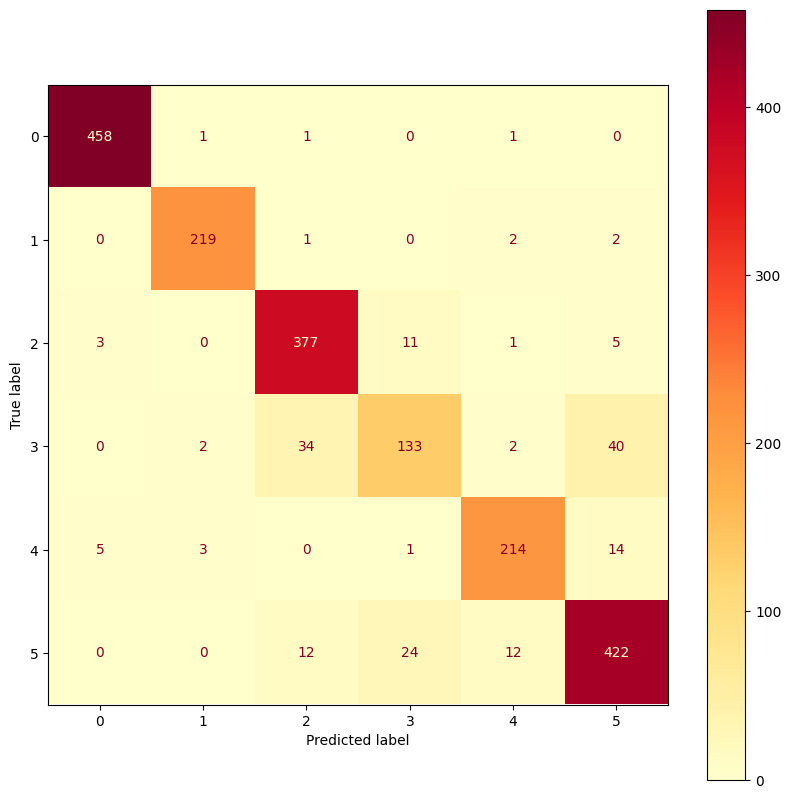

In [25]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='YlOrRd')

### Conclusion
Write a general conclusion about the results of your model.

According to the classification report this model does a very good job of predicting land types. All of the precision, recall, f1 scores, and accuracies were all high except for "4s". 

Although 4's had the lowest scores based on the confusion matrix it looked like the model had the most difficult time predicing 3's. The confusion matrix provides proof the model is good.

### ***Problem 2***

###Reading Data

In [26]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

### Splitting Data into Train/Test

In [27]:
X_train = landsat_train.iloc[:,0:-1]
X_test = landsat_test.iloc[:,0:-1] 
y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

### Building the Pipeline

In [28]:
num_attribs = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2']

In [29]:
col_transform= ColumnTransformer(transformers=[
                                 ('num',MinMaxScaler(),num_attribs)],
                                  remainder='passthrough')

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(max_iter=10000)
svc = SVC(kernel='rbf')

In [36]:
voting = Pipeline([('transform',col_transform),
                   ('voting_en',VotingClassifier(
                       estimators=[
                                  ('knn',knn),
                                   ('lr',lr),
                                   ('svc',svc)
                                   ],voting='hard'))
                ])

### Executing the Model

In [37]:
voting.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('voting_en',
                 VotingClassifier(estimators=[('knn',
                                               KNeighborsClassifier(n_neighbors=3)),
                                              ('lr',
                                               LogisticRegression(max_iter=10000)),
                                              ('svc', SVC())]))])


### Evaluating Model

In [38]:
y_pred = voting.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       461
           2       0.97      0.97      0.97       224
           3       0.87      0.97      0.91       397
           4       0.71      0.55      0.62       211
           5       0.91      0.86      0.89       237
           7       0.84      0.86      0.85       470

    accuracy                           0.89      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.89      0.89      0.89      2000



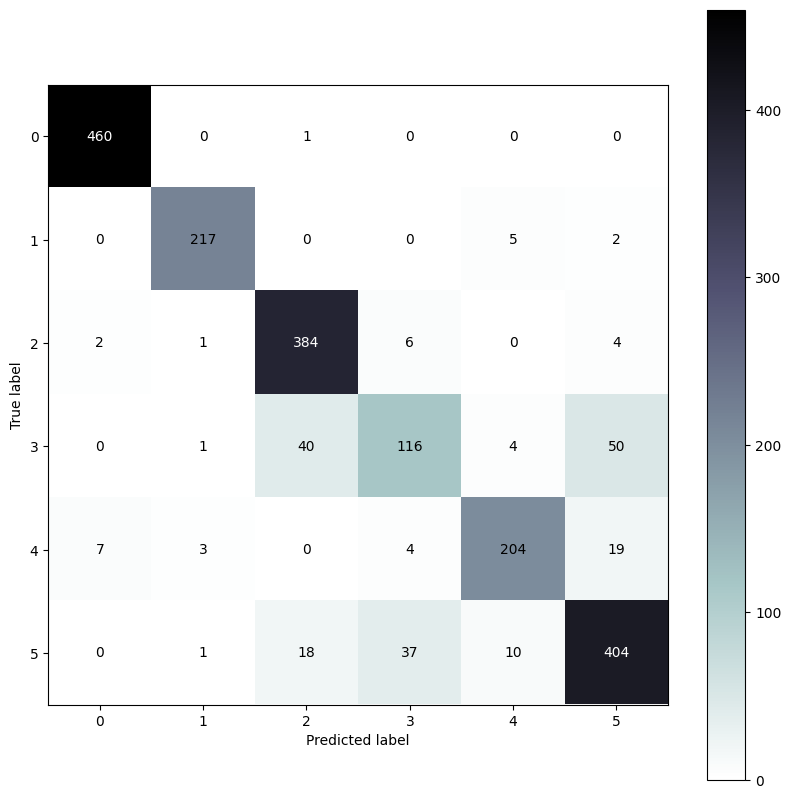

In [54]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='bone_r')

### Conclusion
Write a general conclusion about the results of your model.

Almost all of the percision, recall, f1 and accuracy scores dropped slightly, but the model still does a good job of predicting the land type

### ***Problem 3***

###Reading Data

In [55]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Splitting Data into Train/Test

In [56]:
X = (df[['variance','skewness','curtosis','entropy']])
Y= (df[['forgery']])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=6)

### Building the Pipeline

In [58]:
num_attribs=['variance','skewness','curtosis','entropy']

In [59]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

In [62]:
random_forest= Pipeline([('transform', col_transform),('rf',RandomForestClassifier(n_estimators=1000,max_samples=1097,bootstrap=True,oob_score=True, n_jobs=-1))])

### Executing the Model

In [63]:
random_forest.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=1097, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])


### Evaluating Model

In [64]:
y_pred=random_forest.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       126

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



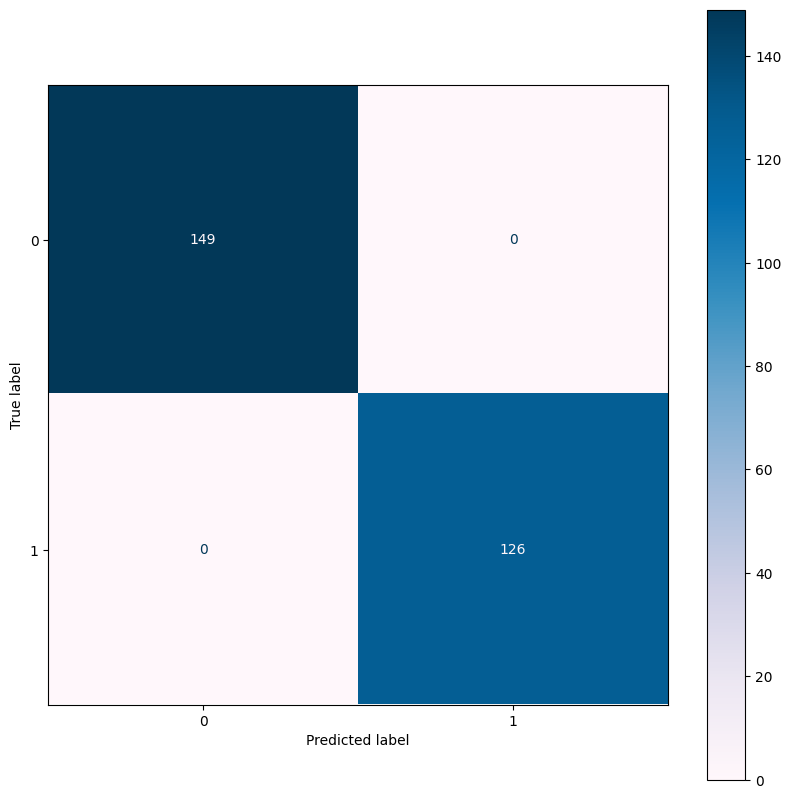

In [69]:
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax=plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap='PuBu')

###Conclusion

The random forrest model predicted weather a bank note was forged perfectly and is a perfect model to predicting forgeries.